In [22]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

In [23]:
# 2 painters simple convnet

In [24]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(412, 550, 3)
)

conv_base.trainable = True
for layer in conv_base.layers[:-2]:
    layer.trainable = False

data_augmentation = keras.Sequential([
    # layers.RandomCrop(412, 550),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomContrast(.1),
    layers.RandomFlip("horizontal_and_vertical")
])


def create_simpleconvnet():
    inputs = keras.Input(shape=(412, 550, 3))
    x = data_augmentation(inputs)
    x = keras.applications.vgg16.preprocess_input(x)
    x = conv_base(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(2, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=1e-6), metrics=["accuracy"])

    model.summary()

    return model

In [25]:
model = create_simpleconvnet()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 412, 550, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 412, 550, 3)       0         
                                                                 
 tf.__operators__.getitem_3  (None, 412, 550, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 412, 550, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 12, 17, 512)       14714688  
                                                                 
 flatten_3 (Flatten)         (None, 104448)            0   

In [26]:
#mix arrays per n elements

def mix(elements1:[], elements2:[], n=5):
    objects_set = []
    labels_set = []
    i = 0
    while i < len(elements1) and i < len(elements2):
            objects_set.append(np.reshape(elements1[i], (412, 550, 3)))
            labels_set.append([1, 0])
    
            objects_set.append(np.reshape(elements2[i], (412, 550, 3)))
            labels_set.append([0, 1])
            
            i+=1
            
    return np.array(objects_set), np.array(labels_set)
    

Epoch 1/50
6/6 [==============================] - ETA: 0s - loss: 7.2046 - accuracy: 0.5118INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 7s/step - loss: 7.2046 - accuracy: 0.5118 - val_loss: 5.0398 - val_accuracy: 0.6200
Epoch 2/50
6/6 [==============================] - ETA: 0s - loss: 5.4063 - accuracy: 0.6118INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 5.4063 - accuracy: 0.6118 - val_loss: 4.1010 - val_accuracy: 0.6650
Epoch 3/50
6/6 [==============================] - ETA: 0s - loss: 5.2962 - accuracy: 0.5824INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 5.2962 - accuracy: 0.5824 - val_loss: 3.4106 - val_accuracy: 0.6900
Epoch 4/50
6/6 [==============================] - ETA: 0s - loss: 4.7838 - accuracy: 0.6647INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 4.7838 - accuracy: 0.6647 - val_loss: 2.8898 - val_accuracy: 0.7100
Epoch 5/50
6/6 [==============================] - ETA: 0s - loss: 4.1214 - accuracy: 0.6471INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 4.1214 - accuracy: 0.6471 - val_loss: 2.4426 - val_accuracy: 0.7350
Epoch 6/50
6/6 [==============================] - ETA: 0s - loss: 3.9129 - accuracy: 0.7176INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 3.9129 - accuracy: 0.7176 - val_loss: 2.1174 - val_accuracy: 0.7500
Epoch 7/50
6/6 [==============================] - ETA: 0s - loss: 5.3393 - accuracy: 0.6235INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 5.3393 - accuracy: 0.6235 - val_loss: 1.8533 - val_accuracy: 0.7850
Epoch 8/50
6/6 [==============================] - ETA: 0s - loss: 3.1704 - accuracy: 0.7118INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 3.1704 - accuracy: 0.7118 - val_loss: 1.7682 - val_accuracy: 0.8150
Epoch 9/50
6/6 [==============================] - ETA: 0s - loss: 3.4263 - accuracy: 0.7176INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 3.4263 - accuracy: 0.7176 - val_loss: 1.7059 - val_accuracy: 0.8250
Epoch 10/50
6/6 [==============================] - ETA: 0s - loss: 2.8480 - accuracy: 0.7529INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.8480 - accuracy: 0.7529 - val_loss: 1.5756 - val_accuracy: 0.8350
Epoch 11/50
6/6 [==============================] - ETA: 0s - loss: 2.9973 - accuracy: 0.7647INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.9973 - accuracy: 0.7647 - val_loss: 1.4316 - val_accuracy: 0.8500
Epoch 12/50
6/6 [==============================] - ETA: 0s - loss: 2.7432 - accuracy: 0.7882INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.7432 - accuracy: 0.7882 - val_loss: 1.2949 - val_accuracy: 0.8550
Epoch 13/50
6/6 [==============================] - ETA: 0s - loss: 2.1546 - accuracy: 0.8059INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.1546 - accuracy: 0.8059 - val_loss: 1.1973 - val_accuracy: 0.8550
Epoch 14/50
6/6 [==============================] - ETA: 0s - loss: 2.7285 - accuracy: 0.7471INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.7285 - accuracy: 0.7471 - val_loss: 1.1144 - val_accuracy: 0.8800
Epoch 15/50
6/6 [==============================] - ETA: 0s - loss: 2.3163 - accuracy: 0.8000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.3163 - accuracy: 0.8000 - val_loss: 1.0459 - val_accuracy: 0.8800
Epoch 16/50
6/6 [==============================] - ETA: 0s - loss: 2.5289 - accuracy: 0.8059INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.5289 - accuracy: 0.8059 - val_loss: 0.9879 - val_accuracy: 0.8850
Epoch 17/50
6/6 [==============================] - ETA: 0s - loss: 2.2061 - accuracy: 0.8588INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.2061 - accuracy: 0.8588 - val_loss: 0.9420 - val_accuracy: 0.8900
Epoch 18/50
6/6 [==============================] - ETA: 0s - loss: 2.3696 - accuracy: 0.8000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.3696 - accuracy: 0.8000 - val_loss: 0.9175 - val_accuracy: 0.9100
Epoch 19/50
6/6 [==============================] - ETA: 0s - loss: 1.5864 - accuracy: 0.8588INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 1.5864 - accuracy: 0.8588 - val_loss: 0.8918 - val_accuracy: 0.9100
Epoch 20/50
6/6 [==============================] - ETA: 0s - loss: 1.7856 - accuracy: 0.8588INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 1.7856 - accuracy: 0.8588 - val_loss: 0.8620 - val_accuracy: 0.9100
Epoch 21/50
6/6 [==============================] - ETA: 0s - loss: 1.7677 - accuracy: 0.8294INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 1.7677 - accuracy: 0.8294 - val_loss: 0.8371 - val_accuracy: 0.9200
Epoch 22/50
6/6 [==============================] - ETA: 0s - loss: 3.0625 - accuracy: 0.8059INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 3.0625 - accuracy: 0.8059 - val_loss: 0.8174 - val_accuracy: 0.9200
Epoch 23/50
6/6 [==============================] - ETA: 0s - loss: 1.9132 - accuracy: 0.8647INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 1.9132 - accuracy: 0.8647 - val_loss: 0.8055 - val_accuracy: 0.9250
Epoch 24/50
6/6 [==============================] - ETA: 0s - loss: 2.6145 - accuracy: 0.8000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 2.6145 - accuracy: 0.8000 - val_loss: 0.7934 - val_accuracy: 0.9250
Epoch 25/50
6/6 [==============================] - ETA: 0s - loss: 2.0483 - accuracy: 0.8647INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 8s/step - loss: 2.0483 - accuracy: 0.8647 - val_loss: 0.7782 - val_accuracy: 0.9250
Epoch 26/50
6/6 [==============================] - ETA: 0s - loss: 1.3406 - accuracy: 0.8588INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 1.3406 - accuracy: 0.8588 - val_loss: 0.7662 - val_accuracy: 0.9250
Epoch 27/50
6/6 [==============================] - ETA: 0s - loss: 1.2015 - accuracy: 0.8706INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.2015 - accuracy: 0.8706 - val_loss: 0.7577 - val_accuracy: 0.9250
Epoch 28/50
6/6 [==============================] - ETA: 0s - loss: 1.0551 - accuracy: 0.9118INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 1.0551 - accuracy: 0.9118 - val_loss: 0.7506 - val_accuracy: 0.9250
Epoch 29/50
6/6 [==============================] - ETA: 0s - loss: 1.2065 - accuracy: 0.9059INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 8s/step - loss: 1.2065 - accuracy: 0.9059 - val_loss: 0.7428 - val_accuracy: 0.9250
Epoch 30/50
6/6 [==============================] - ETA: 0s - loss: 1.4602 - accuracy: 0.8765INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.4602 - accuracy: 0.8765 - val_loss: 0.7354 - val_accuracy: 0.9250
Epoch 31/50
6/6 [==============================] - ETA: 0s - loss: 1.1390 - accuracy: 0.8941INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.1390 - accuracy: 0.8941 - val_loss: 0.7272 - val_accuracy: 0.9250
Epoch 32/50
6/6 [==============================] - ETA: 0s - loss: 1.1636 - accuracy: 0.8706INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 1.1636 - accuracy: 0.8706 - val_loss: 0.7170 - val_accuracy: 0.9250
Epoch 33/50
6/6 [==============================] - ETA: 0s - loss: 1.1617 - accuracy: 0.8588INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 43s 8s/step - loss: 1.1617 - accuracy: 0.8588 - val_loss: 0.7103 - val_accuracy: 0.9250
Epoch 34/50
6/6 [==============================] - ETA: 0s - loss: 1.6963 - accuracy: 0.8353INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 43s 8s/step - loss: 1.6963 - accuracy: 0.8353 - val_loss: 0.7028 - val_accuracy: 0.9200
Epoch 35/50
6/6 [==============================] - ETA: 0s - loss: 0.9972 - accuracy: 0.9000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 0.9972 - accuracy: 0.9000 - val_loss: 0.6958 - val_accuracy: 0.9200
Epoch 36/50
6/6 [==============================] - ETA: 0s - loss: 2.1009 - accuracy: 0.8235INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 2.1009 - accuracy: 0.8235 - val_loss: 0.6851 - val_accuracy: 0.9200
Epoch 37/50
6/6 [==============================] - ETA: 0s - loss: 1.2287 - accuracy: 0.8706INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 41s 7s/step - loss: 1.2287 - accuracy: 0.8706 - val_loss: 0.6724 - val_accuracy: 0.9200
Epoch 38/50
6/6 [==============================] - ETA: 0s - loss: 1.0025 - accuracy: 0.9000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.0025 - accuracy: 0.9000 - val_loss: 0.6638 - val_accuracy: 0.9200
Epoch 39/50
6/6 [==============================] - ETA: 0s - loss: 1.5771 - accuracy: 0.8765INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 43s 8s/step - loss: 1.5771 - accuracy: 0.8765 - val_loss: 0.6554 - val_accuracy: 0.9200
Epoch 40/50
6/6 [==============================] - ETA: 0s - loss: 0.9640 - accuracy: 0.9000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 43s 8s/step - loss: 0.9640 - accuracy: 0.9000 - val_loss: 0.6482 - val_accuracy: 0.9200
Epoch 41/50
6/6 [==============================] - ETA: 0s - loss: 0.8720 - accuracy: 0.9059INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 43s 8s/step - loss: 0.8720 - accuracy: 0.9059 - val_loss: 0.6386 - val_accuracy: 0.9200
Epoch 42/50
6/6 [==============================] - ETA: 0s - loss: 1.4776 - accuracy: 0.8941INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.4776 - accuracy: 0.8941 - val_loss: 0.6311 - val_accuracy: 0.9250
Epoch 43/50
6/6 [==============================] - ETA: 0s - loss: 1.3523 - accuracy: 0.9059INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.3523 - accuracy: 0.9059 - val_loss: 0.6229 - val_accuracy: 0.9250
Epoch 44/50
6/6 [==============================] - ETA: 0s - loss: 0.9697 - accuracy: 0.8941INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 0.9697 - accuracy: 0.8941 - val_loss: 0.6147 - val_accuracy: 0.9250
Epoch 45/50
6/6 [==============================] - ETA: 0s - loss: 1.0041 - accuracy: 0.9000INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.0041 - accuracy: 0.9000 - val_loss: 0.6032 - val_accuracy: 0.9250
Epoch 46/50
6/6 [==============================] - ETA: 0s - loss: 0.8588 - accuracy: 0.9412INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 0.8588 - accuracy: 0.9412 - val_loss: 0.5966 - val_accuracy: 0.9300
Epoch 47/50
6/6 [==============================] - ETA: 0s - loss: 1.0060 - accuracy: 0.9059INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.0060 - accuracy: 0.9059 - val_loss: 0.5876 - val_accuracy: 0.9300
Epoch 48/50
6/6 [==============================] - ETA: 0s - loss: 0.8980 - accuracy: 0.9176INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 0.8980 - accuracy: 0.9176 - val_loss: 0.5813 - val_accuracy: 0.9300
Epoch 49/50
6/6 [==============================] - ETA: 0s - loss: 1.0775 - accuracy: 0.9294INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


INFO:tensorflow:Assets written to: convnet_pretrained_augmentation.tf\assets


6/6 [==============================] - 42s 8s/step - loss: 1.0775 - accuracy: 0.9294 - val_loss: 0.5783 - val_accuracy: 0.9250
Epoch 50/50
6/6 [==============================] - 41s 7s/step - loss: 1.1641 - accuracy: 0.8941 - val_loss: 0.5815 - val_accuracy: 0.9300


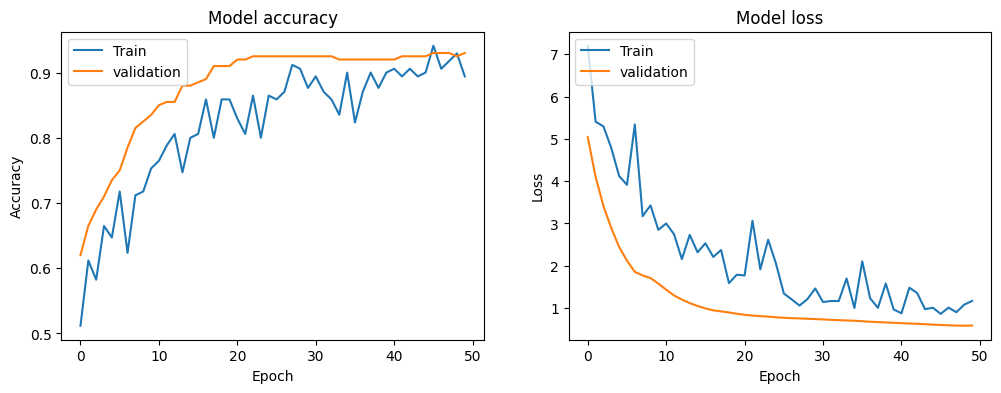

In [27]:
cwd = os.getcwd()

dir_train_rubens = "dataset/validation/rubens"
dir_train_picasso= "dataset/validation/picasso"
dir_validation_rubens = "dataset/test/rubens"
dir_validation_picasso= "dataset/test/picasso"
file_train_rubens = os.listdir(dir_train_rubens)
file_validation_rubens = os.listdir(dir_validation_rubens)
file_train_picasso = os.listdir(dir_train_picasso)
file_validation_picasso = os.listdir(dir_validation_picasso)

train_rubens =[Image.open(os.path.join(dir_train_rubens, file)) for file in file_train_rubens]
train_picasso =[Image.open(os.path.join(dir_train_picasso, file)) for file in file_train_picasso]
validation_rubens = [Image.open(os.path.join(dir_validation_rubens, file)) for file in file_validation_rubens]
validation_picasso = [Image.open(os.path.join(dir_validation_picasso, file)) for file in file_validation_picasso]

train_set, train_labels = mix(train_rubens, train_picasso)
validation_set, validation_labels = mix(validation_rubens, validation_picasso)

train_set = train_set.reshape(len(train_set), 412, 550, 3)
validation_set = validation_set.reshape(len(validation_set), 412, 550, 3)

# train_set, train_labels = get_features_and_labels(train_set, train_labels)
# validation_set, n = get_features_and_labels(validation_set, validation_labels)

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="convnet_pretrained_augmentation.tf", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5) #Stoppen bij gebrek aan verbetering
    ]

history = model.fit(train_set, train_labels, validation_data=(validation_set, validation_labels), epochs=50, callbacks=callbacks)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')

plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler

model = keras.models.load_model('convnet_pretrained_augmentation.tf')

layer_output = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_output.append(layer.output)
        layer_names.append(layer.name)
        
activation_model = keras.Model(inputs=model.input, outputs=layer_output)

img_path = Image.open("dataset/test/picasso/1468.jpg")
img_path = np.reshape(img_path, (412, 550, 3))
img_path = np.expand_dims(img_path, axis=0)

# img_path , _ = get_features_and_labels(img_path, None)
print(img_path.shape)
activations = activation_model.predict(img_path)

images_per_row = 4
for layer_name, layer_activations in zip(layer_names, activations):
    n_features = layer_activations.shape[-1]
    height = layer_activations.shape[2]
    width = layer_activations.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((width + 1) * n_cols - 1, images_per_row * (height + 1) - 1))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            chanal_index = col * images_per_row + row
            channel_img = layer_activations[0, :, :, chanal_index].copy()
            
            if channel_img.sum() != 0:
                channel_img -= channel_img.mean()
                channel_img /= channel_img.std()
                channel_img *= 64
                channel_img += 128

            channel_img = np.clip(channel_img, 0, 255).astype(np.uint8)

            display_grid[
                col * (width + 1) : (col + 1) * width + col, 
                row * (height + 1) : (row + 1) * height + row
            ] = channel_img

    scale_width = 1.0 / width
    scale_height = 1.0 / height
    plt.figure(figsize=(scale_height * display_grid.shape[1],scale_width * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


(1, 412, 550, 3)
1/1 [==============================] - 0s 15ms/step


IndexError: list index out of range

In [ ]:
cwd = os.getcwd()
dir_test_rubens = "dataset/test/rubens"
dir_test_picasso= "dataset/test/picasso"
file_test_rubens = os.listdir(dir_test_rubens)
file_test_picasso = os.listdir(dir_test_picasso)

test_rubens = [Image.open(os.path.join(dir_test_rubens, file)) for file in file_validation_rubens]
test_picasso = [Image.open(os.path.join(dir_test_picasso, file)) for file in file_test_picasso]

test_set, test_labels = mix(test_rubens, test_picasso)

test_set = test_set.reshape(len(test_set), 412, 550, 3)

test_model = keras.models.load_model('convnet_pretrained_augmentation.tf')
test_loss, test_acc = test_model.evaluate(test_set, test_labels)
print('Test loss:', test_loss)